## Import Libraries

In [173]:
import pandas as pd
from  pandas import PeriodIndex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import time
import plotly
import plotly.plotly as py
from sklearn import preprocessing
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
import csv
from sklearn.metrics import mean_squared_error
import math
import datetime as dt
from datetime import datetime
#pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from pandas import RangeIndex
from textblob import TextBlob
import fix_yahoo_finance as yf
import cufflinks as cf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.tree import export_graphviz
import quandl
from matplotlib import style
#style.use('fivethirtyeight')
import pickle
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from graphviz import Digraph
#from hmmlearn.hmm import GaussianHMM
#from hmmlearn.hmm import MultinomialHMM
import matplotlib.cm as cm
import matplotlib.dates as mdates
sb.set_style('whitegrid')



# Stock Price Predictions

## Loading Data Apple Stock Prices for 5 years

In [174]:
#Loading data for Apple Stock Market for 5 years.
df = pd.read_csv('./AAPL-5years.csv', delimiter=',')
df1 = pd.read_csv('./AAPL-5years.csv', delimiter=',', parse_dates=True, index_col=0)
stock_aapl = pd.read_csv('./AAPL-5years.csv', delimiter=',')
df['Date'] = pd.to_datetime(df['Date'])
df[['Date']].set_index('Date')
df['Date']=df['Date'].map(dt.datetime.toordinal) # converting to ordinal form for regression and predictions

## Training the model using Random Forest Regressor

In [96]:
rf = RandomForestRegressor(n_estimators=100,n_jobs=1)
X_rf=df[['Date']]# creating a dataframe for Date
Y_rf=df[['Close']]# creating a dataframe for Close stock prices
X_train_rf,X_test_rf,Y_train_rf,Y_test_rf=train_test_split(X_rf,Y_rf,test_size=0.25,random_state=1)# splitting the dataset into training and testing date
rf.fit(X_train_rf,Y_train_rf)
y_trainPredict_rf=rf.predict(X_train_rf)
y_testPredict_rf=rf.predict(X_test_rf)
r2score=r2_score(Y_test_rf, y_testPredict_rf)
accuracy=rf.score(X_test_rf, Y_test_rf)
#y_predict=pd.DataFrame(rf.predict(X_test),columns=['Y_predict'])
#stock_aapl['linreg_model_mse']=mean_squared_error(y_predict,Y_test)
train_score_rf=math.sqrt(mean_squared_error(Y_train_rf,y_trainPredict_rf))
test_score_rf=math.sqrt(mean_squared_error(Y_test_rf,y_testPredict_rf))
print('Train Score: %.2f RMSE' % (train_score_rf))
print('Test Score: %.2f RMSE' % (test_score_rf))
print('R squared score: %.2f' % (r2score))
print('Accuracy score: %.2f'%(accuracy))


Train Score: 0.59 RMSE
Test Score: 1.65 RMSE
R squared score: 1.00
Accuracy score: 1.00


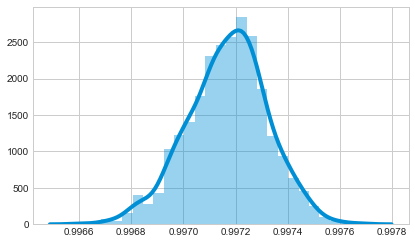

In [175]:
model_accuracy=[]
 
for i in range(1000):
    (X_train,
    X_test,
    Y_train,
    Y_test)=train_test_split(X_rf,Y_rf,test_size=0.20,random_state=0)
    rfr=RandomForestRegressor()
    rfr.fit(X_train, Y_train)
    classifier_accuracy=rfr.score(X_test,Y_test)
    model_accuracy.append(classifier_accuracy)
sb.distplot(model_accuracy)
plt.show()

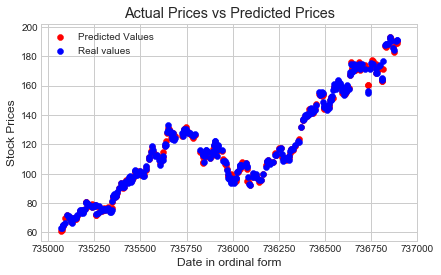

In [176]:
plt.scatter(X_test_rf,y_testPredict_rf,label='Predicted Values',color='r')
plt.scatter(X_test_rf,Y_test_rf, label='Real values',color='b')
plt.legend()
plt.xlabel('Date in ordinal form')
plt.ylabel('Stock Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Predictions Using Linear Regression

In [99]:
stock_aapl=pd.read_csv('./AAPL-5years.csv',delimiter=',')
stock_goog=pd.read_csv('./GOOG.csv',delimiter=',')



In [100]:
linreg=LinearRegression()
stock_aapl['Date'] = pd.to_datetime(stock_aapl['Date'])
stock_aapl['Date']=stock_aapl['Date'].map(dt.datetime.toordinal)
#stock_aapl.dropna(inplace=True)

In [101]:

X=stock_aapl[['Date']]
Y=stock_aapl[['Close']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=1)
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
trainPredict=linreg.predict(X_train)
testPredict=linreg.predict(X_test)
r_score=linreg.score(X_test, Y_test)
r2score=r2_score(Y_test, testPredict)
y_predict=pd.DataFrame(linreg.predict(X_test),columns=['Y_predict'])
stock_aapl['linreg_model_mse']=mean_squared_error(y_predict,Y_test)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test, testPredict))
print('Test Score: %.2f RMSE' % (testScore))
print('Accuracy score: %.2f '%(r_score))
print('R squared: %.2f'%(r2score))
print('Explained Variance Score: %.2f '%explained_variance_score(Y_test,testPredict))

Train Score: 15.59 RMSE
Test Score: 14.35 RMSE
Accuracy score: 0.82 
R squared: 0.82
Explained Variance Score: 0.82 


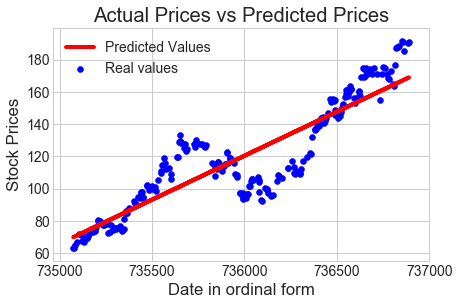

In [103]:
plt.plot(X_test,y_predict,label='Predicted Values',color='r')
plt.scatter(X_test,Y_test, label='Real values',color='b')
plt.legend()
plt.xlabel('Date in ordinal form')
plt.ylabel('Stock Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

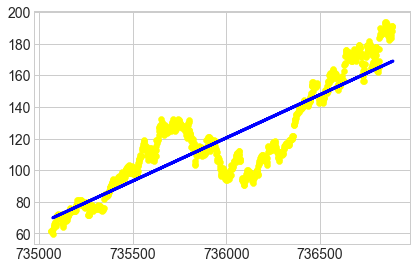

In [104]:
plt.scatter(X_train,Y_train,color='yellow')#plotting the initial datapoints 
plt.plot(X_test,linreg.predict(X_test),color='blue',linewidth=3) #plotting the line made by linear regression
plt.show()



In [105]:
print('The regression intercept is '+str(linreg.intercept_)+'The regression coefficient is '+str(linreg.coef_))


The regression intercept is [-40020.71273548]The regression coefficient is [[0.05453963]]


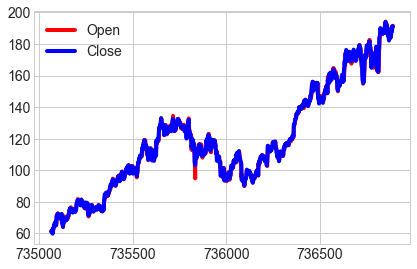

In [106]:
plt.plot(stock_aapl['Date'],stock_aapl['Open'],label='Open',color='r')
plt.plot(stock_aapl['Date'],stock_aapl['Close'],label='Close',color='b')
plt.legend()
plt.show()


In [107]:
#sb.heatmap(stock_aapl.corr())

## Stock Price Prediction using Decision Tree Regressor

In [108]:
stock_aapl=pd.read_csv('./AAPL-5years.csv',delimiter=',')
stock_aapl['Date'] = pd.to_datetime(stock_aapl['Date'])
stock_aapl['Date']=stock_aapl['Date'].map(dt.datetime.toordinal)
X_dtr=stock_aapl[['Date']].values
Y_dtr=stock_aapl[['Close']].values
tree=DecisionTreeRegressor(max_depth=3, random_state=0)
X_train_dtr,X_test_dtr,Y_train_dtr,Y_test_dtr=train_test_split(X_dtr,Y_dtr,test_size=0.20,random_state=1)
tree.fit(X_train_dtr,Y_train_dtr)
y_trainPredict_dtr=tree.predict(X_train_dtr)
y_testPredict_dtr=tree.predict(X_test_dtr)
r2score=r2_score(Y_test_dtr,y_predict_dtr)
accuracyscore=tree.score(X_test_dtr,Y_test_dtr)
train_score_dtr=math.sqrt(mean_squared_error(Y_train_dtr,y_trainPredict_dtr))
test_score_dtr=math.sqrt(mean_squared_error(Y_test_dtr,y_testPredict_dtr))
print('Train Score: %.2f RMSE' % (train_score_dtr))
print('Test Score: %.2f RMSE' % (test_score_dtr))
print('R squared score: %.2f' % (r2score))
print('Accuracy score: %.2f'%(accuracyscore))



Train Score: 7.95 RMSE
Test Score: 7.45 RMSE
R squared score: 0.95
Accuracy score: 0.95


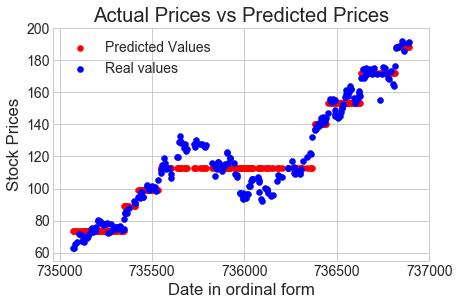

In [109]:
plt.scatter(X_test_dtr,y_predict_dtr,label='Predicted Values',color='r')
plt.scatter(X_test_dtr,Y_test_dtr, label='Real values',color='b')
plt.legend()
plt.xlabel('Date in ordinal form')
plt.ylabel('Stock Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

# Correlation Analysis and Hypothesis Testing

## Importing Data from Quandl


In [110]:
quandl.ApiConfig.api_key = 'dWSjHNuvFJEm9Gum1twe'
df_unemployment = quandl.get('FRED/NROUST', start_date='2013-01-01', end_date='2018-07-01',collapse='quarterly')
#df_unemployment["Unemployment Rate"] = (df_unemployment["Value"]-df_unemployment["Value"][0]) / df_unemployment["Value"][0] * 100.0
df_consumer_index=quandl.get("FRED/DDOE01USA086NWDB", start_date='2013-01-01', end_date='2018-07-01',collapse='quarterly')
df_gdp2=quandl.get("FRED/GDP", start_date='2013-01-01', end_date='2018-07-01',collapse='quarterly')
df_consumer_index2=quandl.get("FRED/CPIAUCSL", start_date='2013-01-01', end_date='2018-07-01',collapse='quarterly')
df_apple=quandl.get("EOD/AAPL", authtoken="dWSjHNuvFJEm9Gum1twe", collapse="quarterly")
df_apple=df_apple.drop(['Dividend','Split','Adj_Open','Adj_High','Adj_Low','Adj_Volume'],axis=1)
df_debt=quandl.get("FRED/GFDEBTN", start_date='2013-01-01', end_date='2018-07-01' , collapse="quarterly")
df_consumption=quandl.get("FRED/PCE",start_date='2013-01-01', end_date='2018-07-01' , collapse="quarterly")
df_income=quandl.get("FRED/MEHOINUSA672N",start_date='2013-01-01', end_date='2018-07-01' ,collapse='quarterly')
df_merged1=pd.merge(df_apple,df_unemployment, on='Date', how='inner')
df_merged2=pd.merge(df_merged1, df_gdp2,on='Date', how='inner')
df_merged3=pd.merge(df_merged2, df_consumer_index2,on='Date', how='inner')
df_merged4=pd.merge(df_merged3, df_consumption,on='Date', how='inner')
df_merged4.columns=['Open','High','Low','Close','Volume','Adj_Close','Unemployment Rate','Gross Domestic Product','Consumer Price Index','Expenditures']
df_merged4

,Open,High,Low,Close,Volume,Adj_Close,Unemployment Rate,Gross Domestic Product,Consumer Price Index,Expenditures
Date,,,,,,,,,,
2013-03-31,449.820,451.819,441.620,442.660,15815700.0,57.068004,5.54,16475.440,232.282,11261.6
2013-06-30,391.360,400.270,388.870,396.530,20661300.0,51.462246,5.40,16541.390,232.445,11320.2
2013-09-30,477.250,481.660,474.411,476.750,9291300.0,62.282664,5.29,16749.349,233.544,11423.9
2013-12-31,554.170,561.280,554.000,561.020,7967300.0,73.720829,5.18,16999.888,234.719,11566.0
2014-03-31,539.230,540.810,535.930,536.740,6023900.0,70.950049,5.07,17031.324,235.956,11715.1
2014-06-30,92.100,93.725,92.090,92.930,49589000.0,86.470101,4.99,17320.921,237.188,11840.1
2014-09-30,100.810,101.540,100.530,100.750,55264139.0,94.212856,4.94,17622.257,237.452,11975.6
2014-12-31,112.820,113.130,110.210,110.380,41403351.0,103.664312,4.88,17735.933,236.270,12095.6
2015-03-31,126.090,126.490,124.355,124.430,42090553.0,117.317417,4.83,17874.715,235.956,12209.6


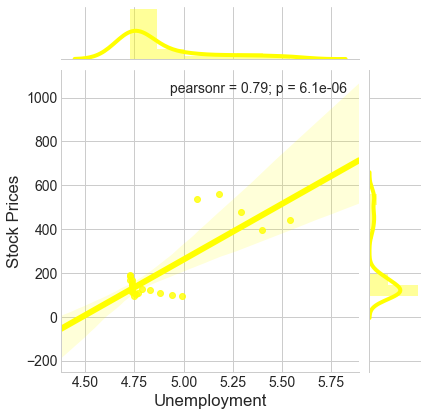

In [111]:
sb.jointplot(x=df_unemployment['Value'],y=df_apple['Close'],kind='reg', color='yellow')
plt.xlabel('Unemployment')
plt.ylabel('Stock Prices')
plt.savefig('Picture1.png')



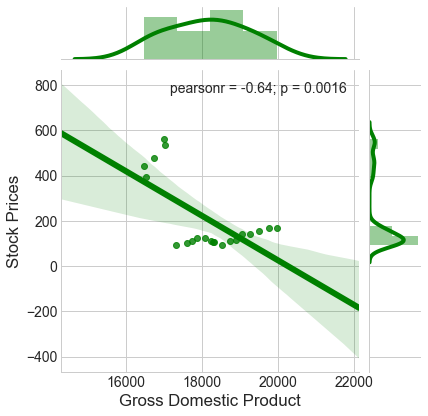

In [112]:
sb.jointplot(x=df_gdp2['Value'],y=df_apple['Close'],kind='reg', color='green')
plt.xlabel('Gross Domestic Product')
plt.ylabel('Stock Prices')
plt.savefig('Picture2.png')

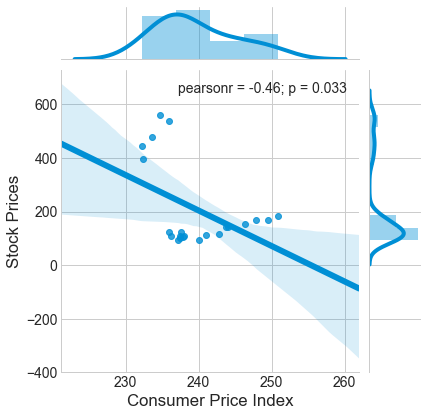

In [113]:
sb.jointplot(x=df_consumer_index2['Value'],y=df_apple['Close'],kind='reg')
plt.xlabel('Consumer Price Index')
plt.ylabel('Stock Prices')
plt.savefig('Picture3.png')



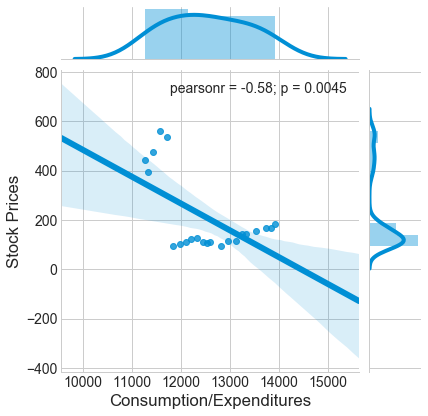

In [114]:
sb.jointplot(x=df_consumption['Value'],y=df_apple['Close'],kind='reg')
plt.xlabel('Consumption/Expenditures')
plt.ylabel('Stock Prices')
plt.savefig('Picture4.png')

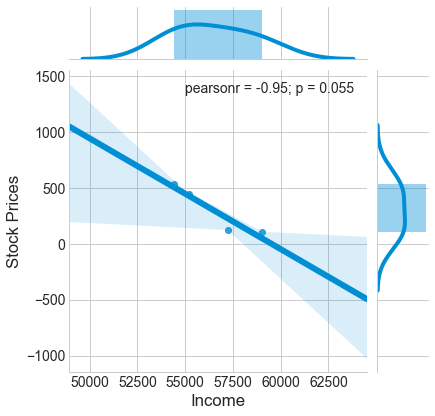

In [115]:
sb.jointplot(x=df_income['Value'],y=df_apple['Close'],kind='reg')
plt.xlabel('Income')
plt.ylabel('Stock Prices')
plt.savefig('Picture5.png')



## Fundamental Factors Correlation Analysis

In [116]:
df1 = pd.read_csv('./AAPL.csv', delimiter=',', parse_dates=True, index_col=0)
stock_aapl = pd.read_csv('./AAPL.csv', delimiter=',')
df1.index
stock_aapl = df1.resample('AS').mean() #Needs index
stock_aapl = stock_aapl.reset_index()
stock_aapl['Date'] = pd.to_datetime(stock_aapl['Date'], errors='coerce')
stock_aapl['Year']= stock_aapl['Date'].dt.year
stock_aapl.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,1980-01-01,0.513393,0.645089,0.450893,0.609375,0.027618,3.362128e+08,1980
1,1981-01-01,0.446242,0.481957,0.382999,0.428385,0.019415,1.707697e+08,1981
2,1982-01-01,0.338914,0.382068,0.302084,0.348028,0.015773,4.451043e+08,1982
3,1983-01-01,0.675595,0.766369,0.566220,0.667411,0.030248,9.273544e+08,1983
4,1984-01-01,0.468006,0.524182,0.426897,0.474516,0.021506,8.745632e+08,1984


In [117]:
stock_fundamentals = pd.read_csv('./fundamentals.csv', delimiter=',')
df2 = pd.read_csv('./fundamentals.csv', delimiter=',')
df2['Period Ending'] = pd.to_datetime(stock_fundamentals['Period Ending'])
df2['Year']= df2['Period Ending'].dt.year
merged_dataset_AAPL = pd.merge(stock_aapl, df2.loc[df2['Ticker Symbol'] == 'AAPL'])
print(list(merged_dataset_AAPL.columns.values))
merged_dataset_AAPL.drop('Unnamed: 0', axis=1)
merged_dataset_AAPL=merged_dataset_AAPL[['Ticker Symbol','Close','Total Revenue','Total Equity','Earnings Per Share', ]]
merged_dataset_AAPL

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable', 'Accounts Receivable', "Add'l income/expense items", 'After Tax ROE', 'Capital Expenditures', 'Capital Surplus', 'Cash Ratio', 'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks', 'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges', 'Deferred Liability Charges', 'Depreciation', 'Earnings Before Interest and Tax', 'Earnings Before Tax', 'Effect of Exchange Rate', 'Equity Es/Loss Unconsolidated Subsidiary', 'Fixed Assets', 'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax', 'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments', 'Liabilities', 'Long-Term Debt', 'Long-Term Investments', 'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow', 'Net Cash Flow-Operating', 'Net Cash Flows-Financing', 'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments', 'Net Income Applicable to C

,Ticker Symbol,Close,Total Revenue,Total Equity,Earnings Per Share
0,AAPL,67.677142,1.709100e+11,1.235490e+11,40.03
1,AAPL,93.932142,1.827950e+11,1.115470e+11,6.49
2,AAPL,119.874168,2.337150e+11,1.193550e+11,9.28
3,AAPL,104.621666,2.156390e+11,1.282490e+11,8.35


,Close,Total Revenue,Total Equity,Earnings Per Share
Close,1.000000,0.940298,-0.061487,-0.839080
Total Revenue,0.940298,1.000000,0.239124,-0.632194
Total Equity,-0.061487,0.239124,1.000000,0.313215
Earnings Per Share,-0.839080,-0.632194,0.313215,1.000000


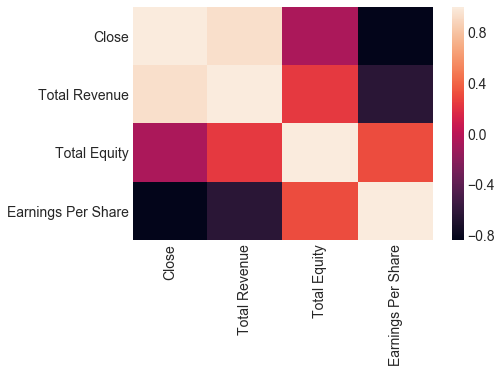

In [118]:
sb.heatmap(merged_dataset_AAPL.corr())
corr=pd.DataFrame(merged_dataset_AAPL.corr())
plt.savefig('Picture5.png')
#plt.hist(corr['Close'],corr['Total Revenue','Total Equity', 'Earnings Per Share','Capital Surplus'])
corr



## Moving Window Functions- Moving Averages

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


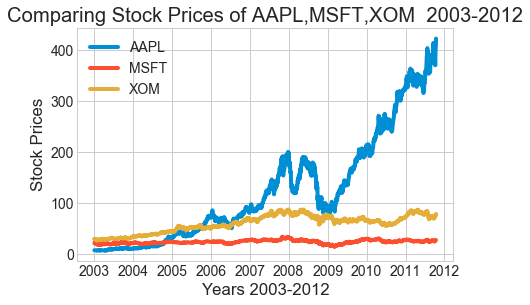

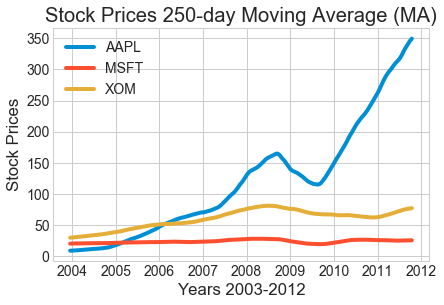

In [152]:
url='https://raw.githubusercontent.com/BrambleXu/pydata-notebook/master/examples/stock_px_2.csv'
stock_data=pd.read_csv(url,parse_dates=True,index_col=0)
stocks=stock_data[['AAPL','MSFT','XOM']]
#close_px.columns=['Date','AAPL','MSFT','XOM','SPX']
stocks=stocks.resample('B').ffill()
stocks.plot()
plt.xlabel('Years 2003-2012')
plt.ylabel('Stock Prices')
plt.title('Comparing Stock Prices of AAPL,MSFT,XOM  2003-2012')
stocks.rolling(250).mean().plot()
plt.xlabel('Years 2003-2012')
plt.ylabel('Stock Prices')
plt.title('Stock Prices 250-day Moving Average (MA)')
stock_data.head()

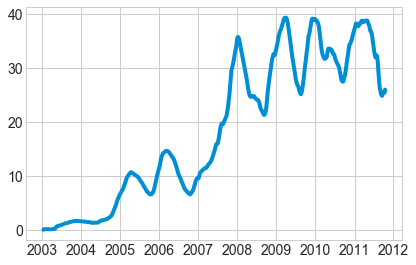

In [120]:
aapl_std250=stocks.AAPL.rolling(250,min_periods=10).std()
aapl_std250[5:12]
aapl_std250.plot()

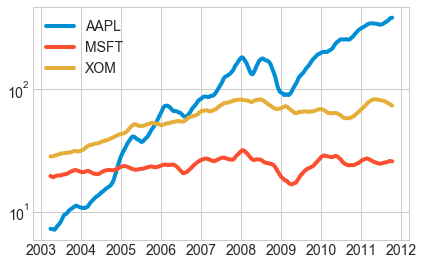

In [121]:
expanding_mean=aapl_std250.expanding().mean()
stocks.rolling(60).mean().plot(logy=True)

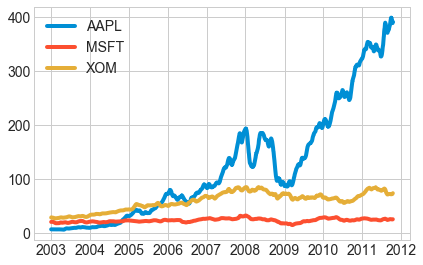

In [122]:
stocks.rolling('20D').mean().plot()

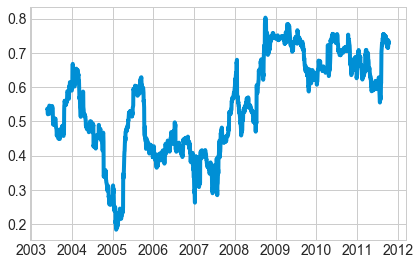

In [123]:
spx_px=stock_data['SPX']
spx_rets=spx_px.pct_change()
returns=stocks.pct_change()
corr=returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)
corr.plot()

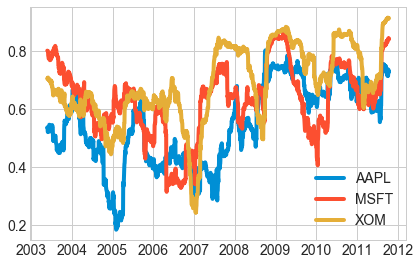

In [124]:
corr=returns.rolling(125,min_periods=100).corr(spx_rets)
corr.plot()

## Bollinger Bands

In [127]:
plotly.tools.set_credentials_file(username='KuhuHalder', api_key='DFwxyyPyEWUzN4MOHop3')
df = pd.read_csv('./AAPL-5years.csv', delimiter=',', parse_dates=True, index_col=0)
df1 = pd.read_csv('./AAPL.csv', delimiter=',', parse_dates=True, index_col=0)
stock_aapl = pd.read_csv('./AAPL-5years.csv', delimiter=',')
stock_aapl = stock_aapl.reset_index()
stock_aapl['Date'] = pd.to_datetime(stock_aapl['Date'], errors='coerce')
stock_aapl['Year']= stock_aapl['Date'].dt.year



In [128]:
qf=cf.QuantFig(df,title='Bollinger Bands', legend='top', name='AAPL')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.iplot()

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~KuhuHalder/0 or inside your plot.ly account where it is named 'Bollinger Bands'


## Moving Averages

In [129]:
quandl.ApiConfig.api_key = 'dWSjHNuvFJEm9Gum1twe'
df_apple=quandl.get("EOD/AAPL", start_date='2017-07-16', end_date='2018-07-18',collapse="daily")
df_apple.drop(['Dividend','Split','Adj_Open','Adj_High','Adj_Low','Adj_Volume'], axis=1)
df_apple_close=pd.DataFrame(df_apple.Close)

In [130]:
df_apple_close['MA_9']=df_apple_close.Close.rolling(9).mean().shift()
df_apple_close['MA_21']=df_apple_close.Close.rolling(21).mean()

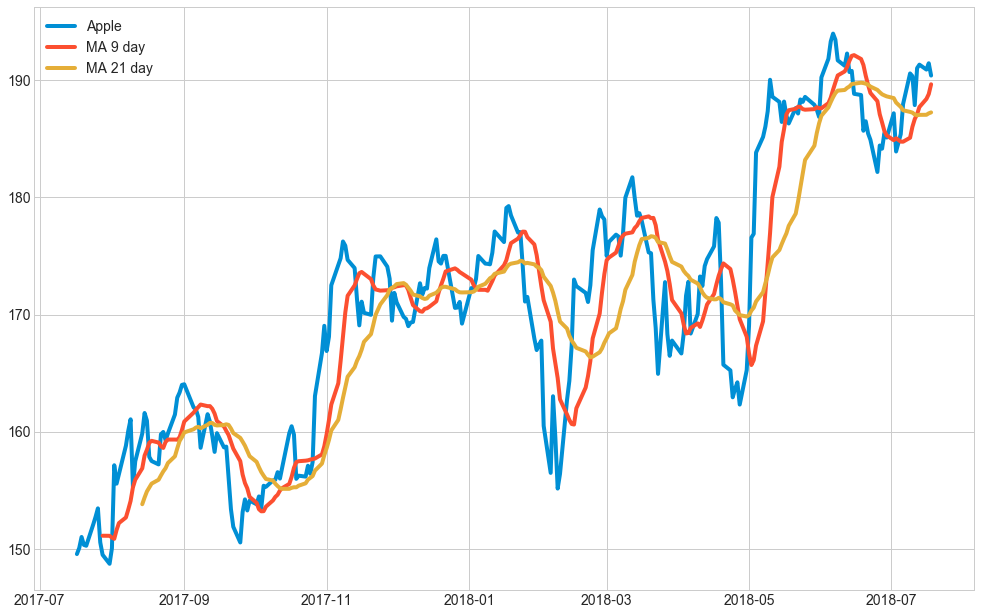

In [134]:
# Moving Averages
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df_apple_close['Close'], label='Apple')
plt.plot(df_apple_close['MA_9'],label='MA 9 day')
plt.plot(df_apple_close['MA_21'],label='MA 21 day')
plt.legend(loc=2)
plt.savefig('Picture6.png')

In [135]:
# Volatility of the daily price change s a 21 day rolling standard deviation
df_apple_close['Change']=np.log(df_apple_close['Close']/df_apple_close['Close'].shift())

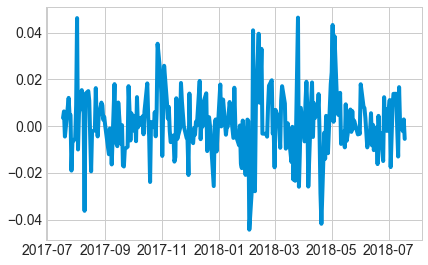

In [136]:
plt.plot(df_apple_close.Change)
plt.savefig("Picture7.png")

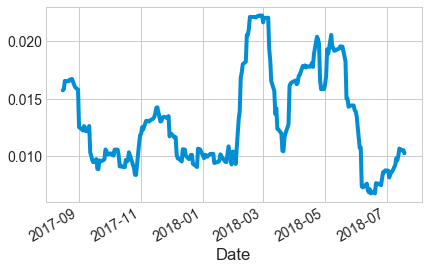

In [137]:
df_apple_close['Volatility']=df_apple_close.Change.rolling(21).std().shift()
df_apple_close['Volatility'].plot()
plt.savefig('Picture8.png')

## Sentiment Analysis

In [138]:
df1 = pd.read_csv('./AAPL.csv', delimiter=',', parse_dates=True, index_col=0)
stock_aapl = pd.read_csv('./AAPL.csv', delimiter=',')
df1.index
stock_aapl = df1.resample('AS').mean()
stock_aapl = stock_aapl.reset_index()
stock_aapl['Date'] = pd.to_datetime(stock_aapl['Date'], errors='coerce')
stock_aapl['Year']= stock_aapl['Date'].dt.year
stock_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,1980-01-01,0.513393,0.645089,0.450893,0.609375,0.027618,3.362128e+08,1980
1,1981-01-01,0.446242,0.481957,0.382999,0.428385,0.019415,1.707697e+08,1981
2,1982-01-01,0.338914,0.382068,0.302084,0.348028,0.015773,4.451043e+08,1982
3,1983-01-01,0.675595,0.766369,0.566220,0.667411,0.030248,9.273544e+08,1983
4,1984-01-01,0.468006,0.524182,0.426897,0.474516,0.021506,8.745632e+08,1984


In [139]:
def sentiment_score(tweet_text):
    return TextBlob(tweet_text).sentiment.polarity

In [151]:
tweet_posts_aapl = pd.read_csv('full-corpus.csv')
tweet_posts_aapl.head()

,Topic,Sentiment,TweetId,TweetDate,TweetText
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now all @Apple has to do is get swype on the i...
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,@Apple will be adding more carrier support to ...
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious @youtube video - guy does a duet wit...
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,@RIM you made it too easy for me to switch to ...
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,I just realized that the reason I got into twi...


In [141]:
tweet_posts_aapl['Score'] = tweet_posts_aapl['TweetText'].apply(sentiment_score)
tweet_posts_aapl.head()

,Topic,Sentiment,TweetId,TweetDate,TweetText,Score
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now all @Apple has to do is get swype on the i...,0.000000
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,@Apple will be adding more carrier support to ...,0.500000
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious @youtube video - guy does a duet wit...,0.393750
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,@RIM you made it too easy for me to switch to ...,0.541667
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,I just realized that the reason I got into twi...,0.200000


In [142]:
tweet_posts_aapl.index
RangeIndex(start=0, stop=5113, step=1)
tweet_posts_aapl['Date'] = pd.to_datetime(tweet_posts_aapl.TweetDate)
tweet_posts_aapl.head()

,Topic,Sentiment,TweetId,TweetDate,TweetText,Score,Date
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now all @Apple has to do is get swype on the i...,0.000000,2011-10-18 21:53:25
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,@Apple will be adding more carrier support to ...,0.500000,2011-10-18 21:09:33
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious @youtube video - guy does a duet wit...,0.393750,2011-10-18 21:02:20
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,@RIM you made it too easy for me to switch to ...,0.541667,2011-10-18 20:40:10
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,I just realized that the reason I got into twi...,0.200000,2011-10-18 20:34:00


In [143]:
tweet_posts_aapl.index = tweet_posts_aapl.Date
tweet_posts_aapl.head()

,Topic,Sentiment,TweetId,TweetDate,TweetText,Score,Date
Date,,,,,,,
2011-10-18 21:53:25,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now all @Apple has to do is get swype on the i...,0.000000,2011-10-18 21:53:25
2011-10-18 21:09:33,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,@Apple will be adding more carrier support to ...,0.500000,2011-10-18 21:09:33
2011-10-18 21:02:20,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious @youtube video - guy does a duet wit...,0.393750,2011-10-18 21:02:20
2011-10-18 20:40:10,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,@RIM you made it too easy for me to switch to ...,0.541667,2011-10-18 20:40:10
2011-10-18 20:34:00,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,I just realized that the reason I got into twi...,0.200000,2011-10-18 20:34:00


In [144]:
tweet_posts_aapl_daily = tweet_posts_aapl[['Score']].resample('D').mean()
tweet_posts_aapl_daily['Score'].head()

Date
2011-10-15    0.072888
2011-10-16    0.118436
2011-10-17    0.110332
2011-10-18    0.099413
2011-10-19    0.081331
Freq: D, Name: Score, dtype: float64

Text(0.5,1,'Stock Prices vs Sentiment Score')

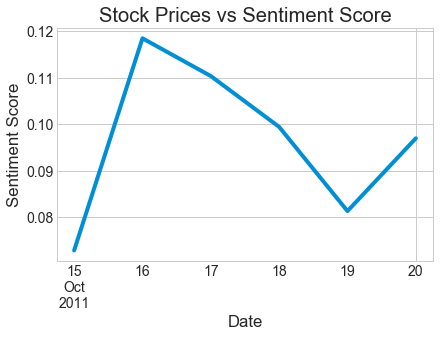

In [145]:
tweet_posts_aapl_daily['Score'].plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Stock Prices vs Sentiment Score')

In [146]:
data = yf.download("AAPL", start="2011-10-15", end="2011-10-20")

[*********************100%***********************]  1 of 1 downloaded


In [147]:
merged_aapl_daily = pd.merge(data['Close'].to_frame().reset_index(), tweet_posts_aapl_daily['Score'].to_frame().reset_index())
merged_aapl_daily

,Date,Close,Score
0,2011-10-17,59.998573,0.110332
1,2011-10-18,60.320000,0.099413
2,2011-10-19,56.945713,0.081331
3,2011-10-20,56.472858,0.096962


In [148]:
corr=merged_aapl_daily['Close'].corr(merged_aapl_daily['Score'])
print('The correlation coefficient '+str(corr))

The correlation coefficient 0.678275249976202


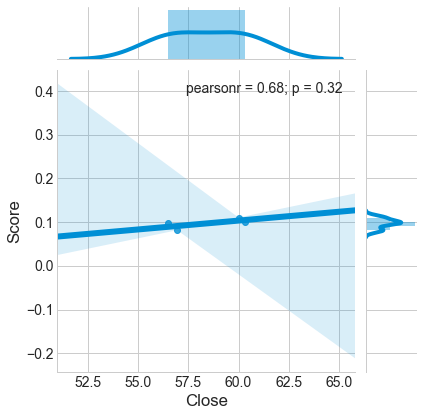

In [149]:
sb.jointplot(x=merged_aapl_daily["Close"],y=merged_aapl_daily['Score'], kind='reg')


In [150]:
#plt.plot(merged_aapl_daily['Score'],merged_aapl_daily['Close'])

## Hidden Markov Chain-Kalman Filter

In [160]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import datetime
import quandl
import csv
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from scipy.stats import invgamma
import datetime as dt
import seaborn as sns
import fix_yahoo_finance as yf
sns.set_style('whitegrid')

In [161]:
quandl.ApiConfig.api_key = 'dWSjHNuvFJEm9Gum1twe'
symbol=['MSFT','INTC','JNJ']
start_time = datetime.datetime(2014, 2, 21)
end_time = datetime.datetime(2015, 4, 30)
print (end_time-start_time)
days = 300
# obtain the close price for 2 stocks
close = np.zeros((len(symbol),days))
for i in range(len(symbol)):
    close[i,:] = quandl.get('EOD/'+symbol[i],start_date=start_time, end_date=end_time).Close
dates = quandl.get('EOD/'+symbol[0],start_date=start_time,end_date=end_time).index

433 days, 0:00:00


In [162]:
# Kalman filter
I = np.matrix([[1.0]])   # identity matrix

# initial state price
def get_init_price(i):
    close_price = close[i,0]
    f = np.matrix([[close_price]])
    return f

# initial uncertainty
init_uncertain = np.matrix([[1.0e1]])

# input noise
input_noise = np.matrix([[0.5]])
#input_noise = np.matrix([[np.random.normal(0,1.0)]])

# next state function
state_func = np.matrix([[1.0]])

# measurement function
m_func = np.matrix([[1.0]])

# measurement noise
m_noise = np.matrix([[0.9]])
#m_noise = np.matrix([[np.random.normal(0,1)]])

# external motion on the market
ext = np.matrix([[4.e-3]])

def kalman_filter(init_price, init_uncertain, state_func, \
                  ext, input_noise, m_func, m_noise, C):
    # implement the filter function
    prediction = np.zeros(shape = (days,))
    sigma = np.zeros(shape = (days,))
    gain = np.zeros(shape = (days,))
    for i in range(days):
        init_price = (state_func*init_price)+ext
        init_uncertain = state_func*init_uncertain*state_func.getT()+input_noise
        # measurement and error
        measure = np.matrix([[C[i]]])
        y = measure.getT()-(m_func*init_price)
        
        # update variables
        Var = m_func*init_uncertain+m_func.getT()+m_noise
        # optimal Kalman gain
        K = init_uncertain*m_func.getT()*Var.getI()  
        init_price += K*y
        init_uncertain = (I - K*m_func)*init_uncertain*(I - K*m_func).getT()+K*m_noise*K.getT()
        prediction[i] = init_price[0,0]
        sigma[i] = np.sqrt(Var)
        gain[i] = K
    return prediction,sigma,gain




In [163]:
pred_price = np.zeros((3,days))
sigma = np.zeros((3,days))
gain = np.zeros((3,days))



In [164]:
for i in range(len(symbol)):
    p,s,g = kalman_filter(get_init_price(i), init_uncertain, state_func, \
                    ext,input_noise, m_func, m_noise, close[i,:])
    
    # get the full range of predicted price
    full = np.concatenate((np.array([close[0,0]]),p[:-1]))
    full_sig = np.concatenate((np.array([0.0]),s[:-1]))
    full_g = np.concatenate((np.array([0.0]),g[:-1]))
    pred_price[i,:] = full
    sigma[i,:] = full_sig
    gain[i,:] = full_g

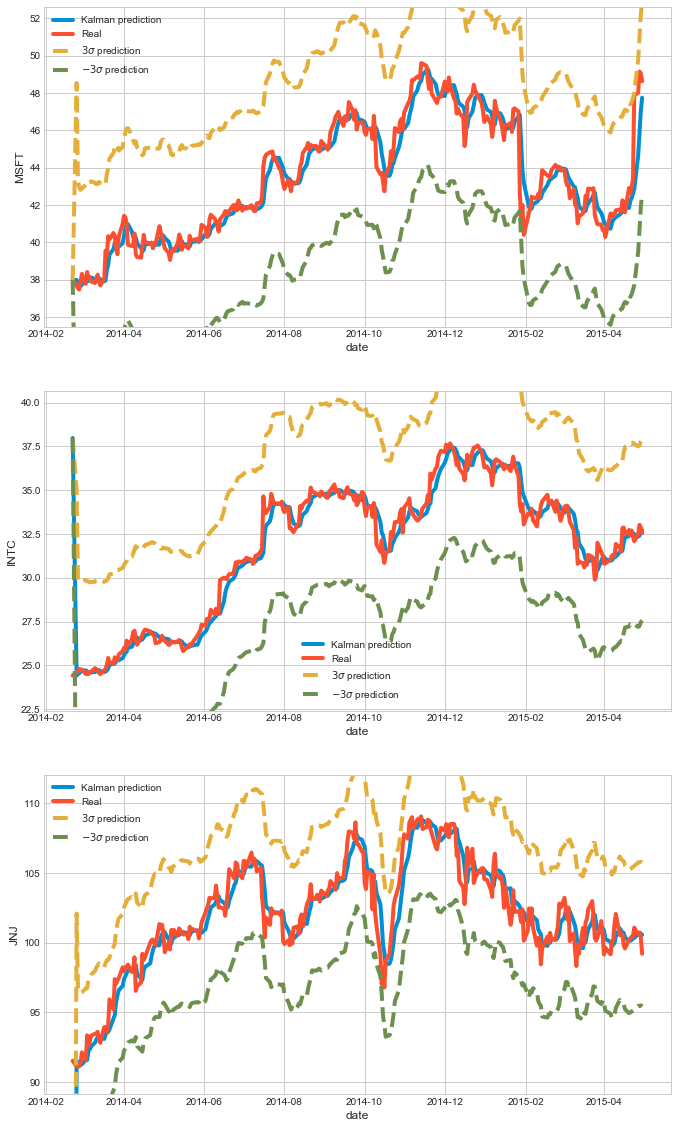

In [177]:
# plot the prediction for 2 stocks
fig = plt.figure(figsize=(10,20))
for i in range(len(symbol)):
    ax = fig.add_subplot(3,1,i+1)
    ax.plot(dates,pred_price[i,:],label='Kalman prediction')
    ax.plot(dates,close[i,:],label='Real')
    ax.plot(dates,pred_price[i,:]+3.0*sigma[i,:],'--',label=r'$3\sigma$'+' prediction')
    ax.plot(dates,pred_price[i,:]-3.0*sigma[i,:],'--',label=r'$-3\sigma$'+' prediction')
    ax.set_xlabel('date')
    ax.set_ylabel(symbol[i])
    ax.set_ylim(min(close[i,:])-2.0,max(close[i,:])+3.0)
    ax.legend(loc='best')

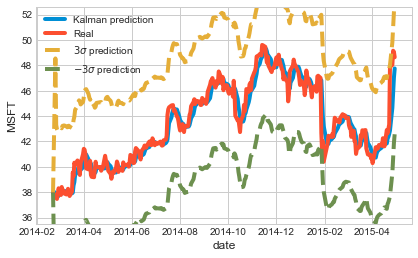

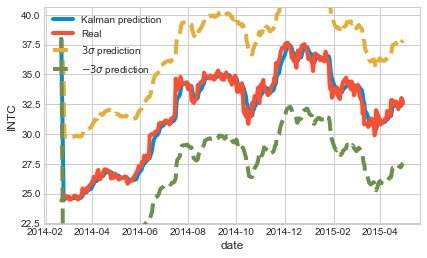

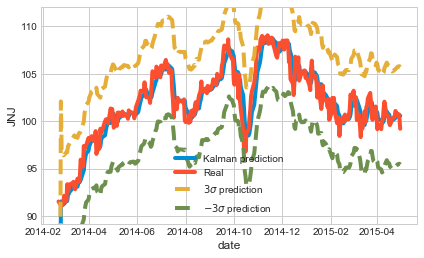

In [166]:
# generate individual prediction plots
for i in range(len(symbol)):
    fig = plt.figure()
    plt.plot(dates,pred_price[i,:],label='Kalman prediction')
    plt.plot(dates,close[i,:],label='Real')
    plt.plot(dates,pred_price[i,:]+3.0*sigma[i,:],'--',label=r'$3\sigma$'+' prediction')
    plt.plot(dates,pred_price[i,:]-3.0*sigma[i,:],'--',label=r'$-3\sigma$'+' prediction')
    plt.xlabel('date')
    plt.ylabel(symbol[i])
    plt.ylim(min(close[i,:])-2.0,max(close[i,:])+3.0)
    plt.legend(loc='best')
    plt.savefig(symbol[i]+'_300_days',format='png')

** Indicators **

We examine the performance of the Kalman filter.
We check the following indicators:
1. Percent return using simple buy/sell strategy
2. Percentage of correct predictions
3. Root-mean-square deviation (RMSE)

In [168]:
# percent return using simple buy/sell strategy
start = 1000   # start with $1000
per_return = np.zeros(len(symbol))+start
close_return = np.zeros(len(symbol))+start
    
for i in range(len(symbol)):
    for j in range(1,days):
        # predict fall -> sell
        if (pred_price[i,j]-pred_price[i,j-1]<0):
            per_return[i] -=1.0
        # predict rise -> buy
        if (pred_price[i,j]-pred_price[i,j-1]>0):
            per_return[i] +=1.0

# compare with the actual percent return
for i in range(len(symbol)):
    for j in range(1,days):
        # fall -> sell
        if (close[i,j]-close[i,j-1]<0):
            close_return[i] -=1.0
        # rise -> buy
        if (close[i,j]-close[i,j-1]>0):
            close_return[i] +=1.0

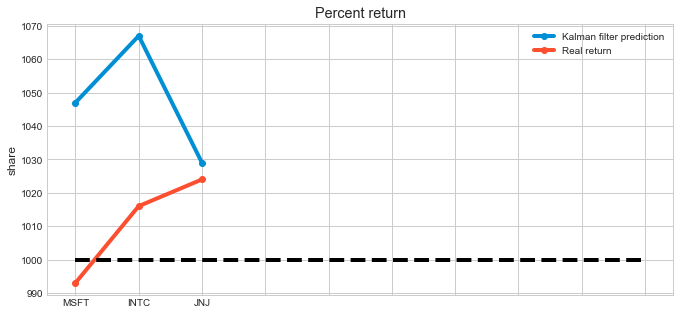

In [169]:
fig = plt.figure(figsize=(10,5))
plt.title('Percent return')
plt.plot(per_return,'o-',label='Kalman filter prediction')
plt.plot(close_return,'o-',label='Real return')
plt.plot(np.linspace(0,9,100),np.array([1000]*100),'k--')
plt.ylabel('share')
plt.xticks(np.arange(0,10,1), symbol)
plt.legend(loc='best')

In [170]:
# percentage of correct predictions
acc = np.zeros(len(symbol))

for i in range(len(symbol)):
    for j in range(1,days):
        # predict fall
        if (pred_price[i,j]-pred_price[i,j-1]< 0):
            # actual price fall
            if (close[i,j]-close[i,j-1]<0):
                acc[i] +=1
        # predict rise
        if (pred_price[i,j]-pred_price[i,j-1]> 0):
            # actual rise
            if (close[i,j]-close[i,j-1]>0):
                acc[i] +=1
        # predict no change
        if (pred_price[i,j]-pred_price[i,j-1]== 0):
            # actual no change
            if (close[i,j]-close[i,j-1]==0):
                acc[i] +=1
acc = acc/float(days)
print (acc)

[0.47       0.46333333 0.47      ]


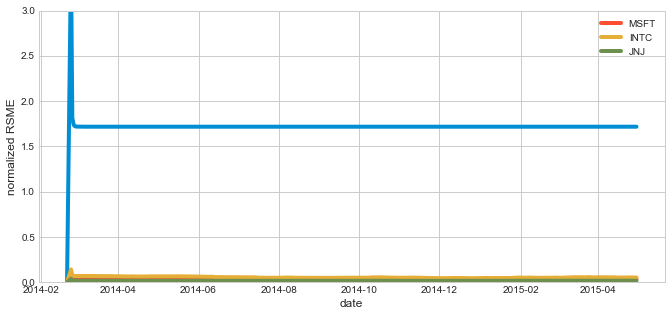

In [171]:
# Root-mean-square deviation (RMSE)
# plot and compare the normalized error
fig = plt.figure(figsize=(10,5))
plt.plot(dates,sigma[0,:])
for i in range(len(symbol)):
    plt.plot(dates,sigma[i,:]/close[i,:],label=symbol[i])
plt.ylim(0,3)
plt.xlabel('date')
plt.ylabel('normalized RSME')
plt.legend(loc='best')



In [172]:
# prediction interval
# percentage of correct predictions
acc_int = np.zeros(len(symbol))

for i in range(len(symbol)):
    for j in range(1,days):
        # predict within the interval
        if (abs(close[i,j]-pred_price[i,j])<=3.0*sigma[i,j]):
                acc_int[i] +=1
        
acc_int = acc_int/float(days)
print ('the accuracy of prediction interval is'), acc_int

the accuracy of prediction interval is


(None, array([0.99666667, 0.99666667, 0.99666667]))